In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')

%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf  #binds pandas and plotly
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot

import folium  #use to make maps

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df = pd.read_excel('drive/MyDrive/Covid19DataAnalysis/Covid cases in India.xlsx')

In [6]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [8]:
df.drop('S. No.', axis=1, inplace=True)

In [9]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [11]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [12]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [13]:
total_cases = df['Total Cases'].sum()
print("Total cases in India are ", total_cases)

Total cases in India are  729


In [14]:
df['Active Cases'] = df['Total Cases'] - (df['Cured']+df['Death'])

In [15]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [24]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [25]:
total_active_cases = df.groupby('Name of State / UT')['Active Cases'].sum()
total_active_cases

Name of State / UT
Andhra Pradesh        11
Bihar                  6
Chandigarh             7
Chhattisgarh           6
Delhi                 32
Goa                    6
Gujarat               40
Haryana               19
Himachal Pradesh       3
Jammu and Kashmir     16
Karnataka             15
Kerala               127
Ladakh                13
Madhya Pradesh        22
Maharashtra          128
Manipur                1
Mizoram                1
Odisha                 3
Puducherry             1
Punjab                28
Rajasthan             40
Tamil Nadu            33
Telengana             44
Uttar Pradesh         32
Uttarakhand            4
West Bengal           10
Name: Active Cases, dtype: int64

In [27]:
total_active_cases=total_active_cases.sort_values(ascending=False)

In [28]:
total_active_cases=total_active_cases.to_frame()

In [29]:
total_active_cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [30]:
total_active_cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [31]:
##Graphical Representation

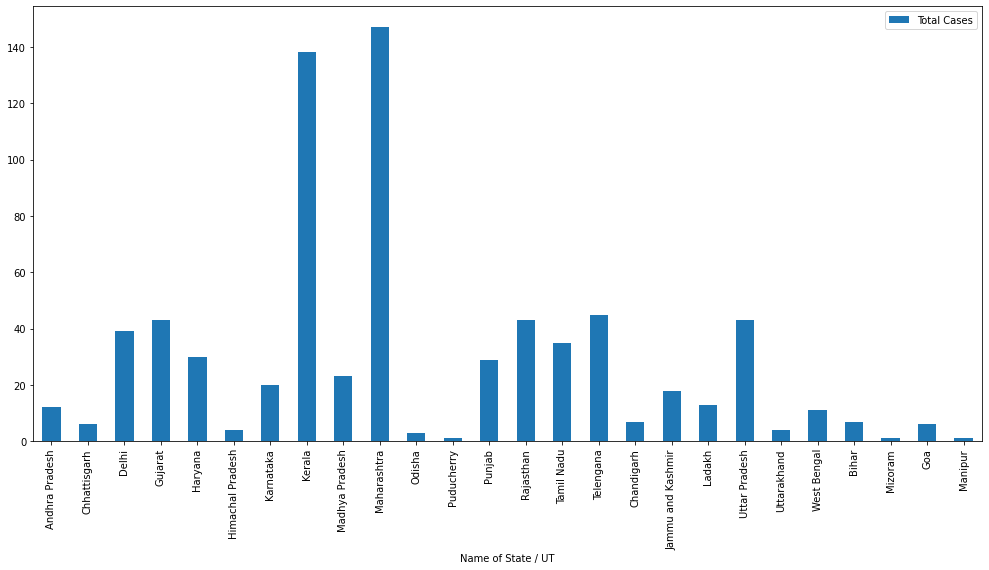

In [40]:
#create graph using pandas
df.plot(kind='bar', x='Name of State / UT', y='Total Cases')

<BarContainer object of 26 artists>

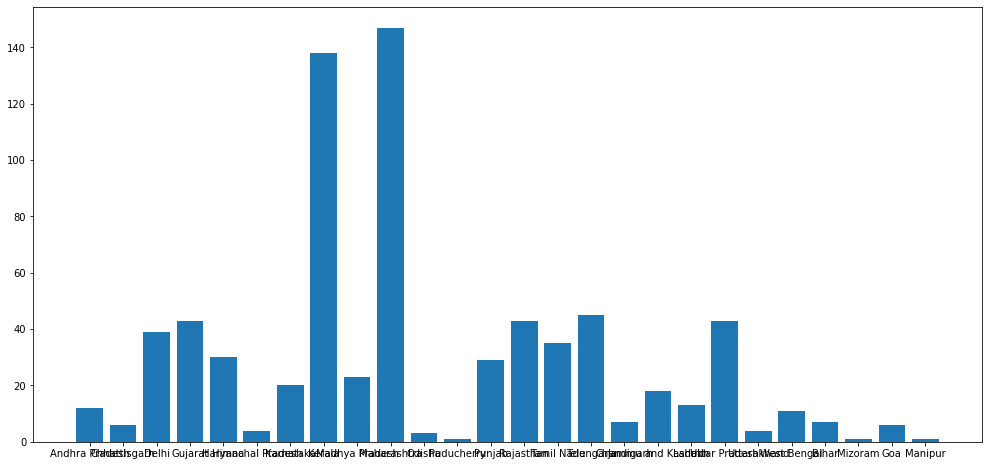

In [41]:
#create graph using matplotlib
plt.bar(df['Name of State / UT'], df['Total Cases'])

In [42]:
#create graph using plotly
df.iplot(kind='bar', x='Name of State / UT', y='Total Cases')

In [46]:
px.bar(df,x='Name of State / UT', y='Total Cases')

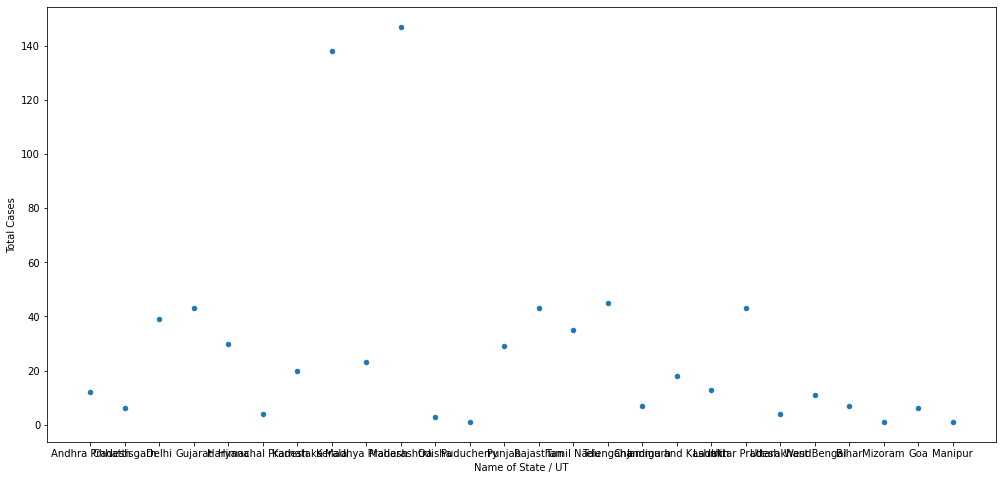

In [47]:
df.plot(kind='scatter', x='Name of State / UT', y='Total Cases')

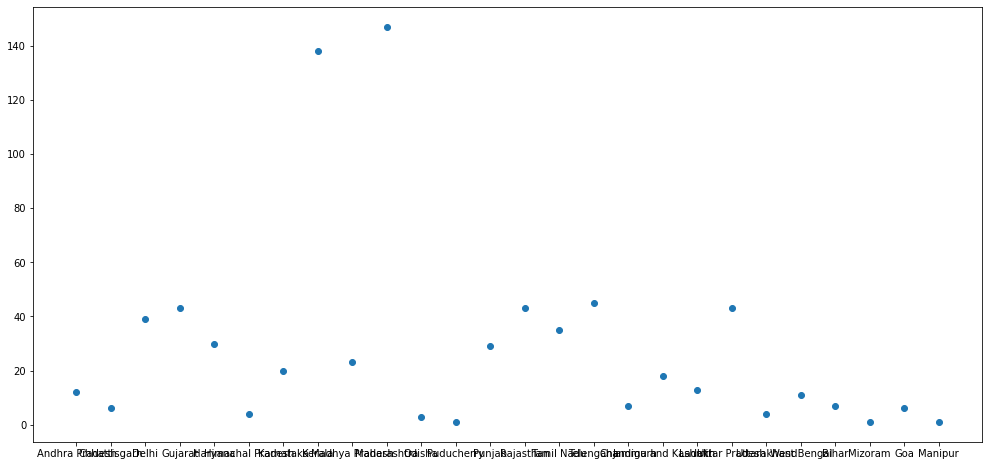

In [48]:
plt.scatter(df['Name of State / UT'], df['Total Cases'])

In [51]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='My Graph',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=20)
px.scatter(df,x='Name of State / UT', y='Total Cases')

In [52]:
#object oriente method for matplotlib and plotly

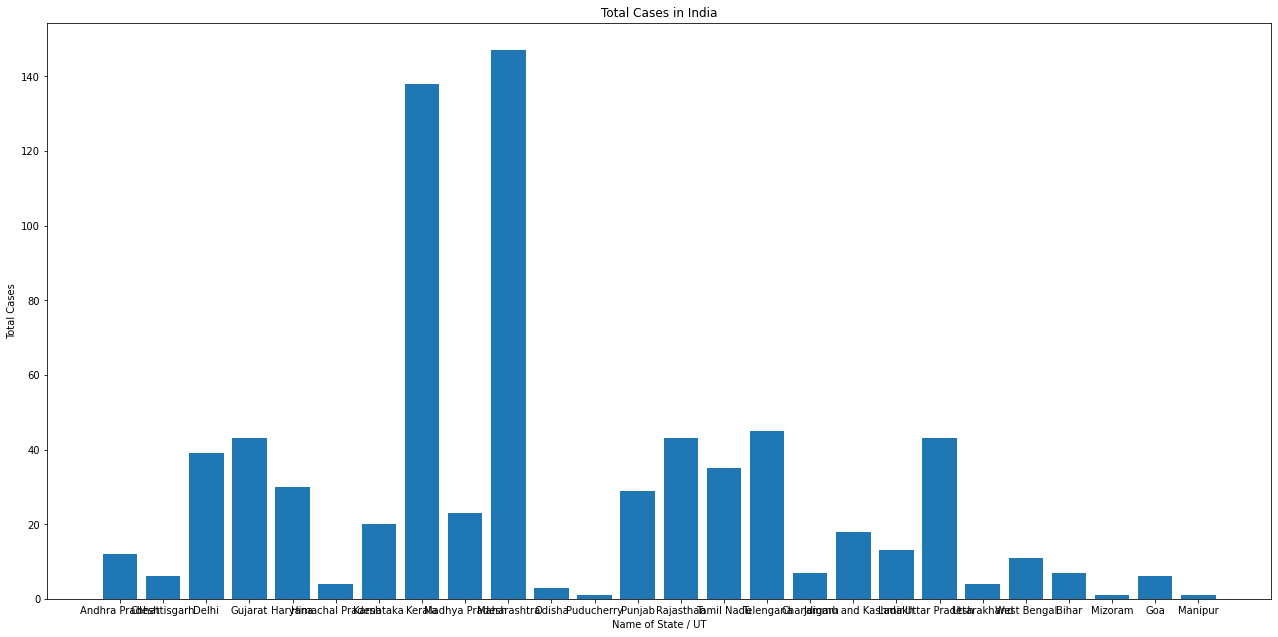

In [57]:
#Matplotlib
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()

#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

In [58]:
Indian_Cord = pd.read_excel('drive/MyDrive/Covid19DataAnalysis/Indian Coordinates.xlsx')

In [59]:
Indian_Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [60]:
df_full = pd.merge(Indian_Cord,df,on='Name of State / UT')
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [62]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
  folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [63]:
map

In [64]:
## How Coronavirus is rising Globally

In [66]:
df_india = pd.read_excel('drive/MyDrive/Covid19DataAnalysis/per_day_cases.xlsx',parse_dates=True,sheet_name='India')
df_italy = pd.read_excel('drive/MyDrive/Covid19DataAnalysis/per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
df_korea = pd.read_excel('drive/MyDrive/Covid19DataAnalysis/per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
df_wuhan = pd.read_excel('drive/MyDrive/Covid19DataAnalysis/per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

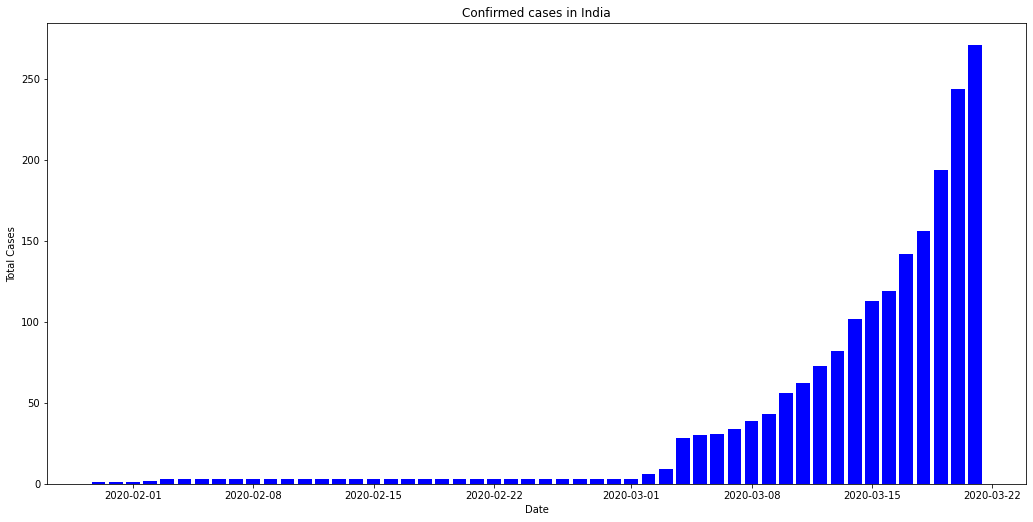

In [67]:
#Matplotlib
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(df_india["Date"],df_india["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#plotly Express

fig=px.bar(df_india,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [68]:
fig=px.bar(df_italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

fig=px.bar(df_korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()

fig=px.bar(df_wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

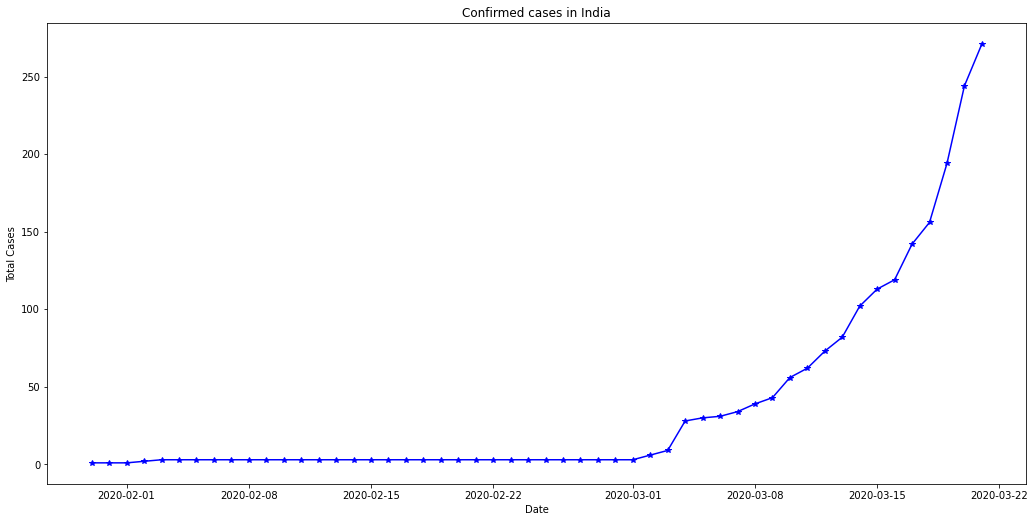

In [69]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(df_india["Date"],df_india["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#plotly Express

fig=px.scatter(df_india,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [70]:
#Plotly
df_india.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [71]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['Total Cases'],mode='lines+markers'))

In [72]:
#Subplots using Bar Graph
from plotly.subplots import make_subplots

In [73]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=df_korea['Date'],y=df_korea['Total Cases'],
                    marker=dict(color=df_korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=df_italy['Date'],y=df_italy['Total Cases'],
                    marker=dict(color=df_italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=df_india['Date'],y=df_india['Total Cases'],
                    marker=dict(color=df_india['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=df_wuhan['Date'],y=df_wuhan['Total Cases'],
                    marker=dict(color=df_wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [74]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=df_korea['Date'],y=df_korea['Total Cases'],
                    marker=dict(color=df_korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=df_italy['Date'],y=df_italy['Total Cases'],
                    marker=dict(color=df_italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=df_india['Date'],y=df_india['Total Cases'],
                    marker=dict(color=df_india['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=df_wuhan['Date'],y=df_wuhan['Total Cases'],
                    marker=dict(color=df_wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')